In [ ]:
import numpy as np
import pandas as pd #data
import cv2 as cv #for imaging application
from google.colab.patches import cv2_imshow #for image display
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt

[[64. 74. 70. ... 34. 44. 53.]
 [80. 71. 68. ... 28. 30. 30.]
 [87. 69. 69. ... 35. 34. 31.]
 ...
 [17. 28. 38. ... 24. 30. 37.]
 [22. 29. 35. ... 25. 27. 41.]
 [32. 27. 29. ... 33. 27. 44.]]
2
(573, 700)


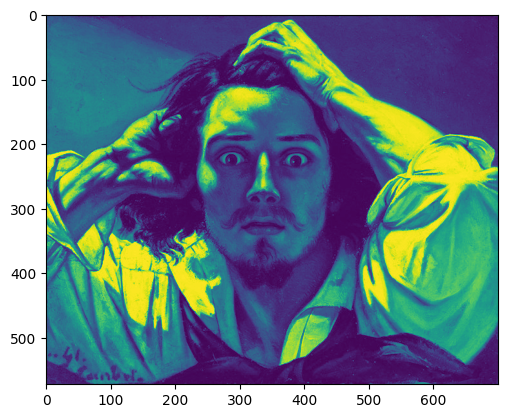

In [ ]:
#todo:load image
url = "https://images.squarespace-cdn.com/content/v1/57f0b8c859cc68fe6a908fb7/1475729642651-RRGZTQ14003WXW68INRO/image-asset.jpeg?format=2500w"
myImg = io.imread(url) #Colour Image - 3 bands RGB - 3D array
gray_image = cv.cvtColor(myImg,cv.COLOR_BGR2GRAY) # To Convert this into 2 dimensional array will convert into gray image - avg of all three color bands
img_mat = np.array(list(gray_image),float)
print(img_mat) # values will be between 0 -255 , 0-black, 255-white
print(img_mat.ndim)
print(img_mat.shape)
plt.imshow(img_mat)

[[[ 86.  79.  25.]
  [ 98.  89.  34.]
  [ 97.  84.  31.]
  ...
  [ 18.  40.  28.]
  [ 30.  50.  39.]
  [ 38.  58.  49.]]

 [[105.  95.  42.]
  [ 97.  85.  33.]
  [ 95.  82.  29.]
  ...
  [ 14.  34.  23.]
  [ 18.  35.  25.]
  [ 19.  34.  27.]]

 [[114. 100.  51.]
  [ 96.  82.  33.]
  [ 98.  82.  31.]
  ...
  [ 24.  40.  30.]
  [ 25.  38.  29.]
  [ 22.  35.  28.]]

 ...

 [[ 22.  24.   3.]
  [ 37.  35.  12.]
  [ 52.  45.  19.]
  ...
  [ 26.  28.  15.]
  [ 32.  34.  20.]
  [ 39.  42.  25.]]

 [[ 26.  29.   8.]
  [ 36.  36.  12.]
  [ 48.  43.  14.]
  ...
  [ 27.  29.  18.]
  [ 29.  31.  18.]
  [ 43.  46.  29.]]

 [[ 34.  39.  17.]
  [ 32.  34.  10.]
  [ 41.  37.   8.]
  ...
  [ 35.  37.  26.]
  [ 29.  31.  18.]
  [ 46.  49.  32.]]]
3


(573, 700, 3)


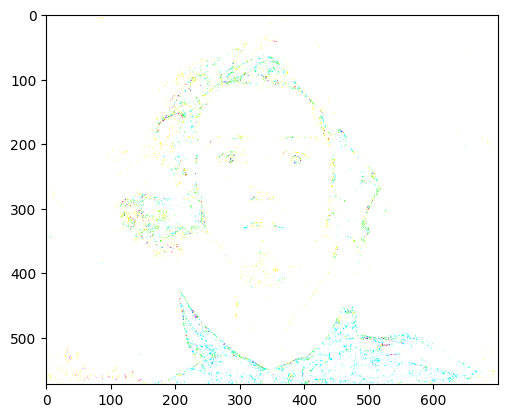

In [ ]:
mylist = np.array(list(myImg),float)
print(mylist)
print(mylist.ndim)
plt.imshow(mylist)
print(mylist.shape)

In [ ]:
#scale the image matrix before SVD - such that mean becomes 0 and std becomes 1
img_mat_scaled = (img_mat - img_mat.mean())/img_mat.std()

In [ ]:
#perform SVD using np.linalg
U, s, V = np.linalg.svd(img_mat_scaled)
U

array([[ 2.99235838e-02, -4.09328599e-02,  1.23294244e-02, ...,
         1.23138474e-02,  2.83158382e-02, -9.22885293e-02],
       [ 3.13573743e-02, -4.22535149e-02,  1.10716452e-02, ...,
         4.26253296e-03, -4.18509930e-02,  2.44144421e-01],
       [ 3.06579143e-02, -4.10176067e-02,  1.07755879e-02, ...,
        -1.95203787e-02,  8.97301970e-02, -3.76349906e-01],
       ...,
       [ 2.06675521e-02, -5.06765196e-02,  2.89116003e-02, ...,
        -2.50442192e-02,  3.48136793e-03, -4.07595733e-04],
       [ 1.88976894e-02, -5.46321030e-02,  2.00384587e-02, ...,
         3.98101837e-02, -1.04320495e-02, -2.04596006e-04],
       [ 1.74946600e-02, -5.33014714e-02,  1.22608031e-02, ...,
        -1.09486969e-02, -5.74792356e-03,  2.78614721e-03]])

In [ ]:
#compute variance by each singular vector
var_explained = np.round(s**2/np.sum(s**2),decimals = 3)

TypeError: ignored

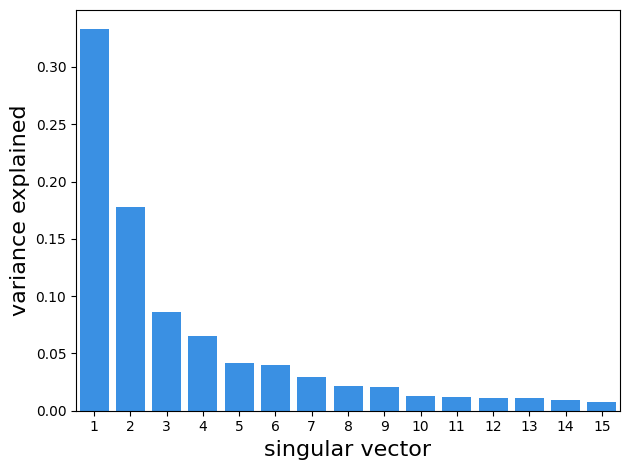

In [ ]:
import seaborn as sns
sns.barplot(x=list(range(1,16)),y =var_explained[0:15], color='dodgerblue')
plt.xlabel('singular vector',fontsize = 16)
plt.ylabel('variance explained', fontsize=16)
plt.tight_layout()
plt.savefig('svd_scree_plot.png', dpi=150, figsize=(8,8))

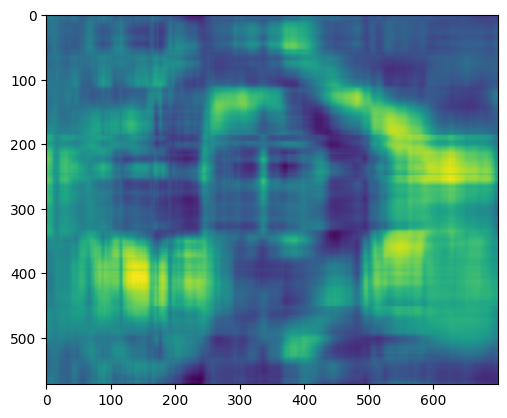

In [ ]:
#reconstruction with top 5 singular values
num_components = 5
reconst_img_5 = np.array(U[:,:num_components]).dot(np.diag(s[:num_components]).dot(np.array(V[:num_components])))
plt.imshow(reconst_img_5)

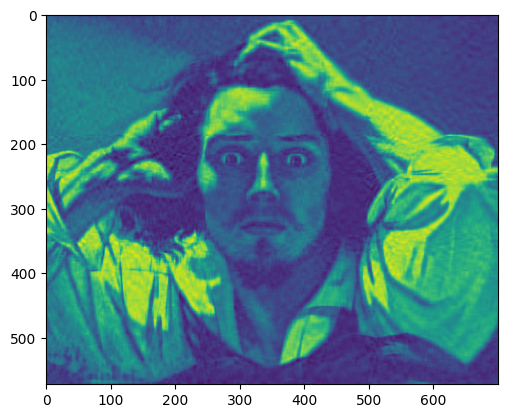

In [ ]:
#reconstruction with top 50 singular values
num_components = 50
reconst_img_50 = np.array(U[:,:num_components]).dot(np.diag(s[:num_components]).dot(np.array(V[:num_components])))
plt.imshow(reconst_img_50)

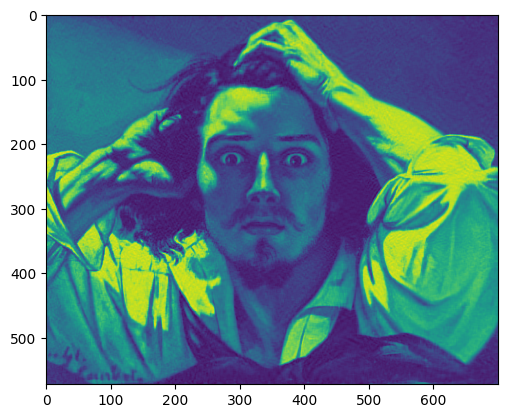

In [ ]:
#reconstruction with top 100 singular values
num_components = 100
reconst_img_100 = np.array(U[:,:num_components]).dot(np.diag(s[:num_components]).dot(np.array(V[:num_components])))
plt.imshow(reconst_img_100)

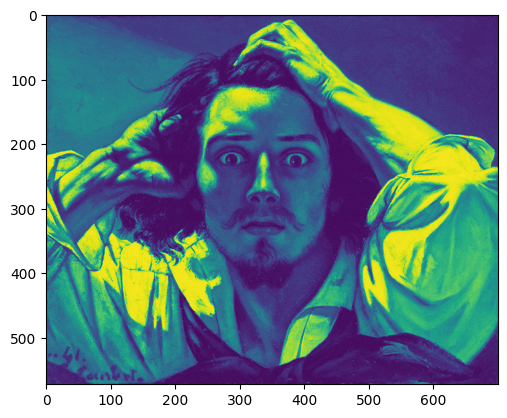

In [ ]:
#reconstruction with top 400 singular values
num_components = 400
reconst_img_400 = np.array(U[:,:num_components]).dot(np.diag(s[:num_components]).dot(np.array(V[:num_components])))
plt.imshow(reconst_img_400)

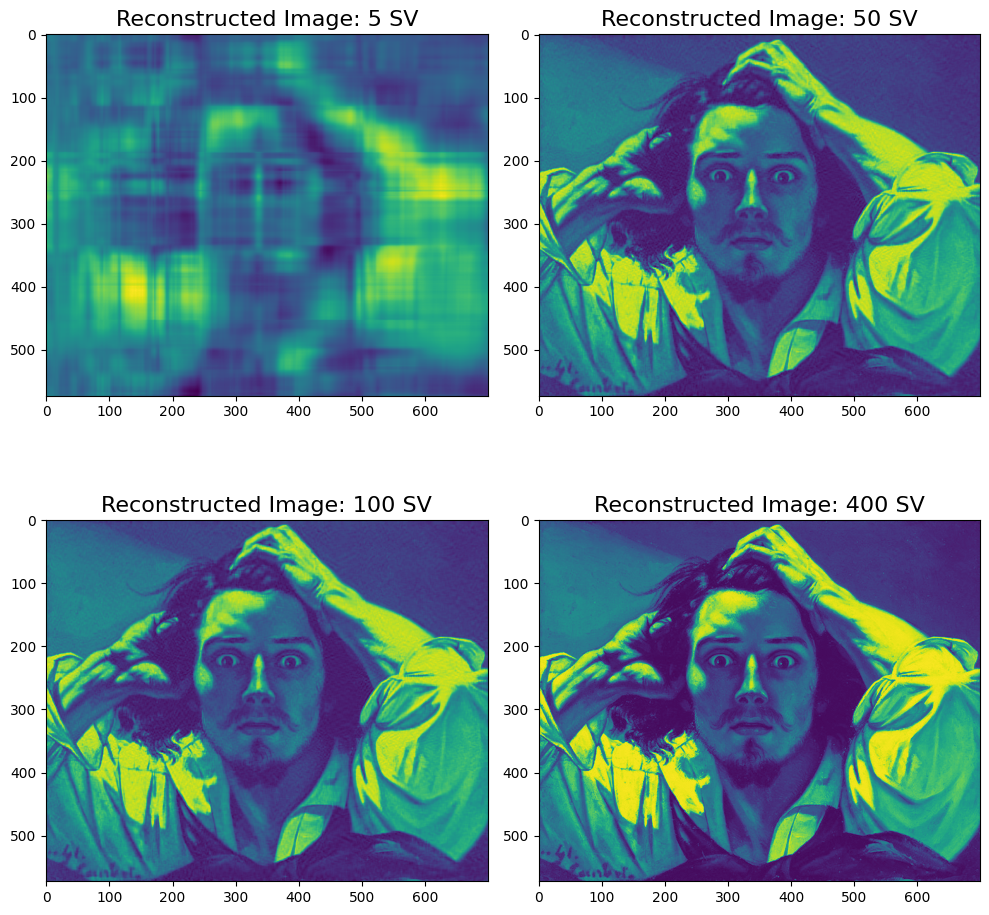

In [ ]:
fig,axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].imshow(reconst_img_5)
axs[0,0].set_title('Reconstructed Image: 5 SV', size = 16)
axs[0,1].imshow(reconst_img_50)
axs[0,1].set_title('Reconstructed Image: 50 SV', size = 16)
axs[1,0].imshow(reconst_img_100)
axs[1,0].set_title('Reconstructed Image: 100 SV', size = 16)
axs[1,1].imshow(reconst_img_400)
axs[1,1].set_title('Reconstructed Image: 400 SV', size = 16)
plt.tight_layout()